<h1><center>SELECCIÓN PARA CONCURSO DE UNIVERSIDAD (ESTATUS): ÁRBOL DE DECISIÓN Y BOSQUE ALEATORIO</center></h1>
This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.


__Autores:__
1. Aguilar Melanie.
2. Montaño David
3. Peñafiel Daniela.

Paqueterías importantes
---

In [88]:
### Preprocesamiento
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Visaulización
import seaborn as sns
import matplotlib.pyplot as plt

### Modelaje y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


### Ajustes
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 12)
pd.set_option('display.max_columns', 90)
pd.options.mode.chained_assignment = None 


Extracción de datos
---

In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv"); df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Información
__sl_no__: Serial Number<br>
__gender__: Gender<br>
__ssc_p__: Secondary Education percentage- 10th Grade<br>
__ssc_b__: Board of Education- Central/ Others<br>
__hsc_p__: Higher Secondary Education percentage- 12th Grade<br>
__hsc_b__: [Board of Education](https://en.wikipedia.org/wiki/Board_of_education)- Central/ Others<br> 
__hsc_s__: Specialization in Higher Secondary Education<br>
__degree_p__: Degree Percentage<br>
__degree_t__: Under Graduation(Degree type)- Field of degree education<br>
__workex__: Work Experience<br>
__etest_p__: Employability test percentage ( conducted by college)<br>
__specialisation__: Post Graduation(MBA)- Specialization<br>
__mba_p__: MBA percentage<br>
__status__: Status of placement- Placed/Not placed<br>
__salary__: Salary offered by corporate to candidates<br>

Existen 67 (__31% de la información total__) valores Nulos o __NaN__ de la columna _Salary_ con un tipo de dato float64. Muy probablemente tengan que ser sustituidos por el promedio de los datos. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


1. La columna _Si_no_ se trata de una columna con índices, pues su mínimo es 1 y su máximo es 215, que concuerda con el número de registros de la matriz.
2. Con respecto a las columnas concernientes a calificaciones, todas tienen rangos entre 0 y 100, lo cual indica que no existen valores NaN representados con .1, 99, 0 o cualquier otro tipo de represenación.
3. Los salarios son muy altos para tratarse de dólares americanos; la base de datos fue proporcionada por una universidad india. [Aquí puedes ver el tipo de cambio a pesos mexicanos (MXN)](https://www.google.com/search?q=moneda+de+india&rlz=1C1CHBF_frMX913MX913&sxsrf=AOaemvJN_z9PADjnfHGD-K0_ca8OLQb8nA%3A1630203759635&ei=b-8qYa-FJpe-tAb-hZmYBg&oq=moneda+de+india&gs_lcp=Cgdnd3Mtd2l6EAMyCQgjECcQRhD7ATIKCAAQgAQQhwIQFDIFCAAQgAQyBQgAEIAEMgYIABAWEB4yBggAEBYQHjIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjIGCAAQFhAeOgcIABBHELADOgcIABCwAxBDOgoILhDIAxCwAxBDOgQIIxAnOgQILhBDOgQIABBDOgcIABDJAxBDOgUIABCSAzoHCAAQgAQQCjoECAAQCjoKCC4QxwEQrwEQCjoHCCMQsQIQJ0oFCDgSATFKBAhBGABQ6SBYxkJgyURoCHACeAOAAesEiAGKH5IBDDEuMTkuMi4xLjAuMZgBAKABAcgBD8ABAQ&sclient=gws-wiz&ved=0ahUKEwjv-IOgltXyAhUXH80KHf5CBmMQ4dUDCA4&uact=5). Se concluye que los salarios están en Rupias indias y anuales (también puede considerarse el caso en que sean mensuales).

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


No existen valores duplicados.

In [5]:
df.drop_duplicates().shape

(215, 15)

Se borra la columna _sl_no_.

In [6]:
df.drop(columns = "sl_no", inplace = True)

Visualización de datos
---
Se tomarán en cuenta los datos brutos, incluyendo los Nan valores de la columna _salary_ dado que se cuenta con el 70% de la información.

### GENDER
Existe una mayor proporción de hombres que de mujeres que fueron candidatos al concurso de selección. Esto puede deberse a diversas causas, pero quizás una muy puntual sea [esta](https://time.com/5614642/india-girls-education/).

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

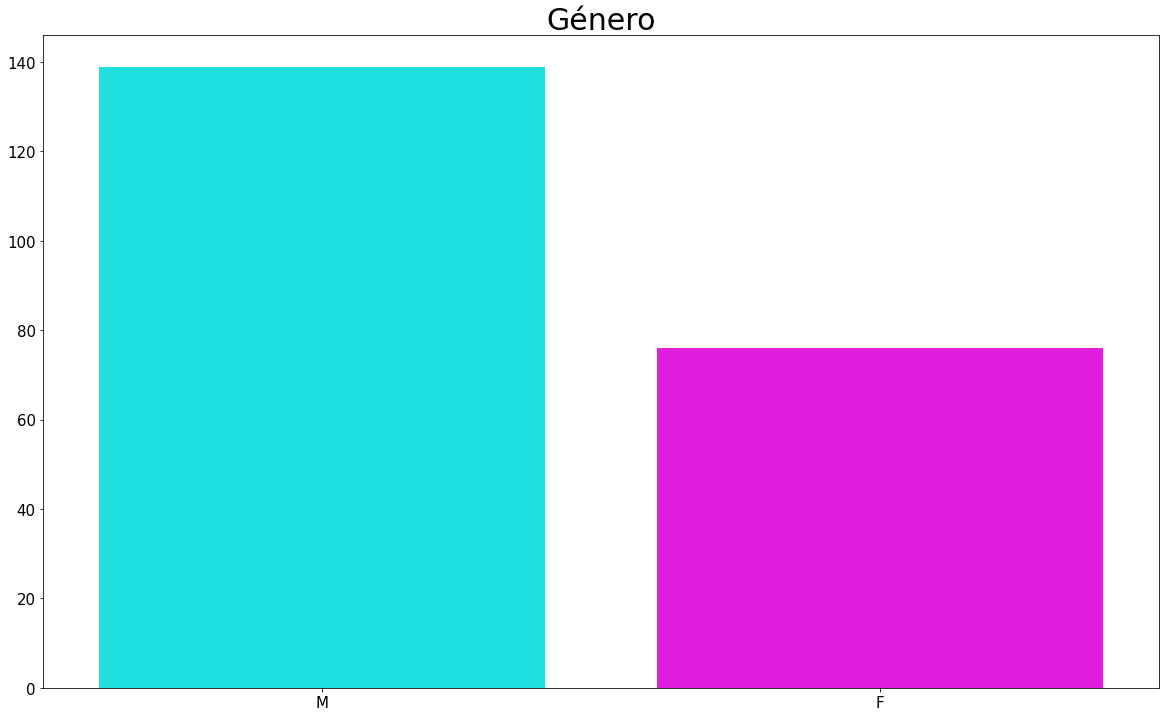

In [7]:
sns.countplot(df.gender, palette = ["aqua","magenta"])
plt.title("Género", size = 30)
plt.xlabel("")
plt.ylabel("")
plt.yticks(size = 15) 
plt.xticks(size = 15) 

### SSC_P
Se presenta una distribución con un ligero sesgo negativo, aun cuando su moda está posicionada más a la izquierda. Dado que la mediana esta por arriba de 60%, se puede concluir que los estudiantes de 10 grado tienden a aprobar sus cursos con mayor frecuencia. Son pocos los casos que obtienen 40% y 50%. Ninguna persona en este conjunto de datos obtuvo 100%, ni siquiera 90%. Se puede asegurar que al menos el 50% de los alumnos aprueban el curso sin presentar tanta varianza en cuanto a sus calificaciones. 

Text(0.5, 0.98, 'Promedios 10° grado')

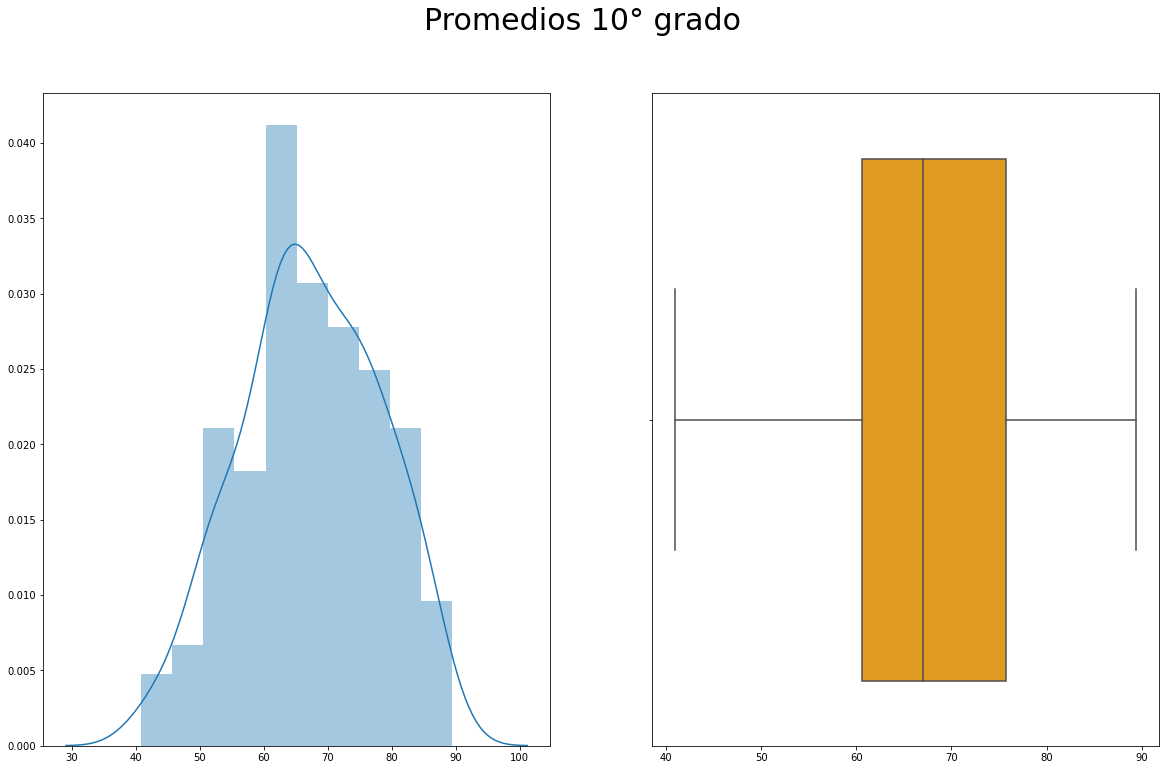

In [8]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(df.ssc_p)
plt.xlabel("")
plt.subplot(1,2,2)
sns.boxplot(df.ssc_p, color = "orange")
plt.xlabel("")
fig.suptitle('Promedios 10° grado', size = 30)

### SSC_B y HSC_B
La mayoría de los estudiantes tienen un comité educativo __central__ en décimo grado; por otra parte, cuando cursan el doceavo grado, hay una tendencia a cambiar a __otro__ tipo de comité.

Text(0.5, 0.98, 'Comités educativos')

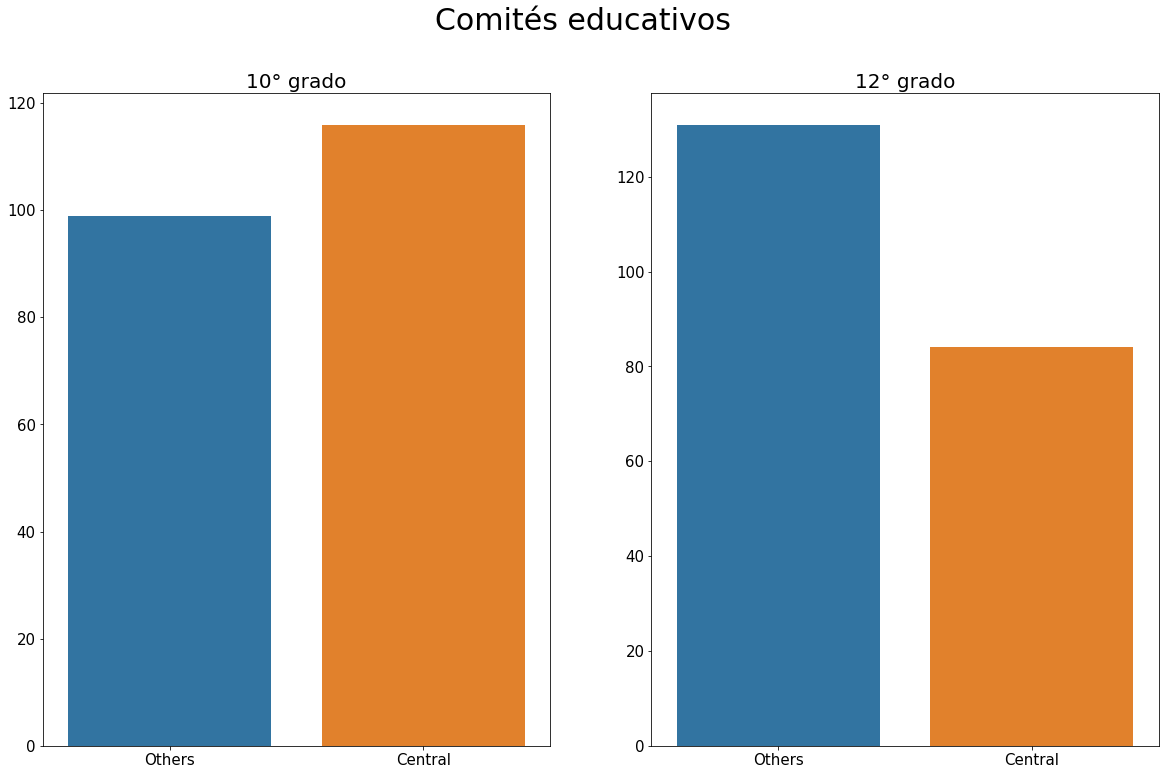

In [9]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.countplot(df.ssc_b)
plt.gca().set_title('10° grado', size = 20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.subplot(1,2,2)
sns.countplot(df.hsc_b)
plt.gca().set_title('12° grado', size = 20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(size = 15)
plt.yticks(size = 15)
fig.suptitle('Comités educativos', size = 30)

### HSC_P
Se ve significativamente un decremento en cuanto a la mediana de las calificaciones si se compara con las de 10° grado. Esto puede deberse a la dificultad que implica asistir a cursos más avanzados. La moda se sitúa por 60%, mientras que la mediana está por 65. La distribució nuevamente presenta un sesgo negativo. Algo a resaltar es el hecho de que ahora sí existen 3 alumnos que obtuvieron más de 90% como calificación; en contraste, existen personas quienes rompieron el mínimo de la barrara del 40%. En general, la variabilidad respecto a la media es poca y nuevamente se puede asegurar que al menos el 50% de los alumnos acreditaron el curso con una calificación mayor a 60%.

Text(0.5, 0.98, 'Promedios 12° grado')

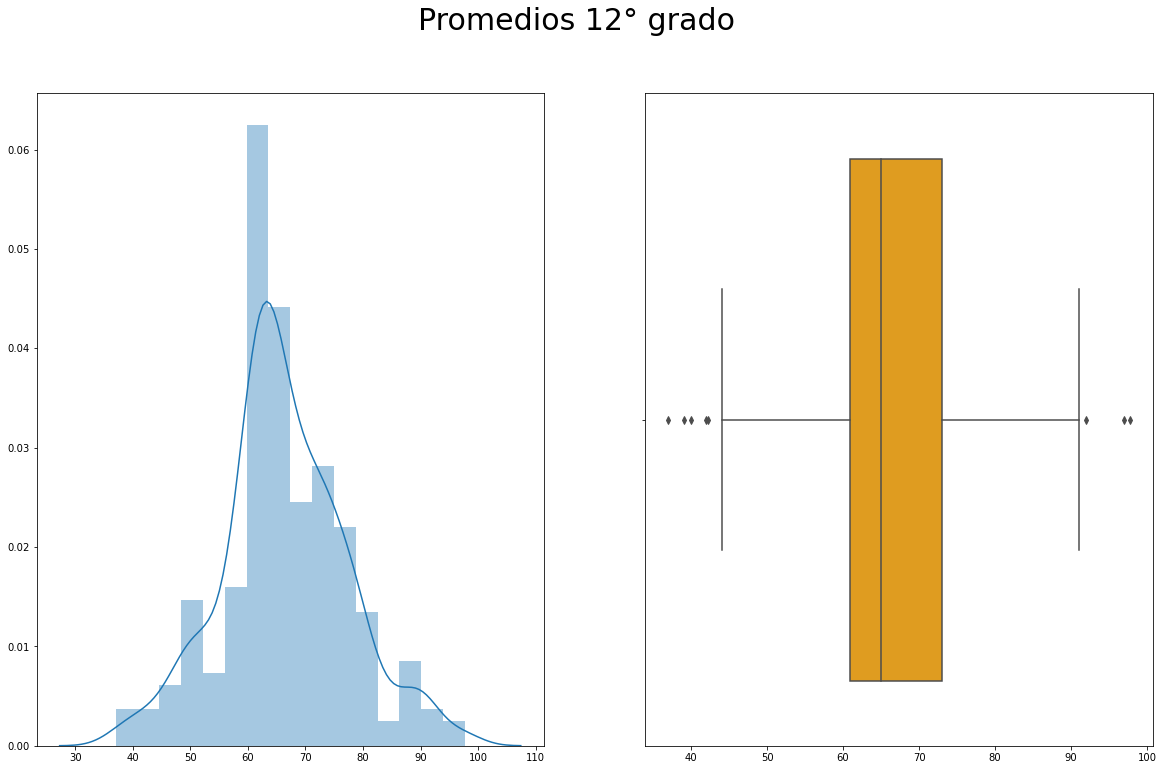

In [10]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(df.hsc_p)
plt.xlabel("")
plt.subplot(1,2,2)
sns.boxplot(df.hsc_p, color = "orange")
plt.xlabel("")
fig.suptitle('Promedios 12° grado', size = 30)

### HSC_S
Respecto a las especializaciones que escogen los alumnos en la secundaria, destaca el número de aquellos que se van a Comercio, después Ciencias y en el último puesto, Artes.

Text(0, 0.5, '')

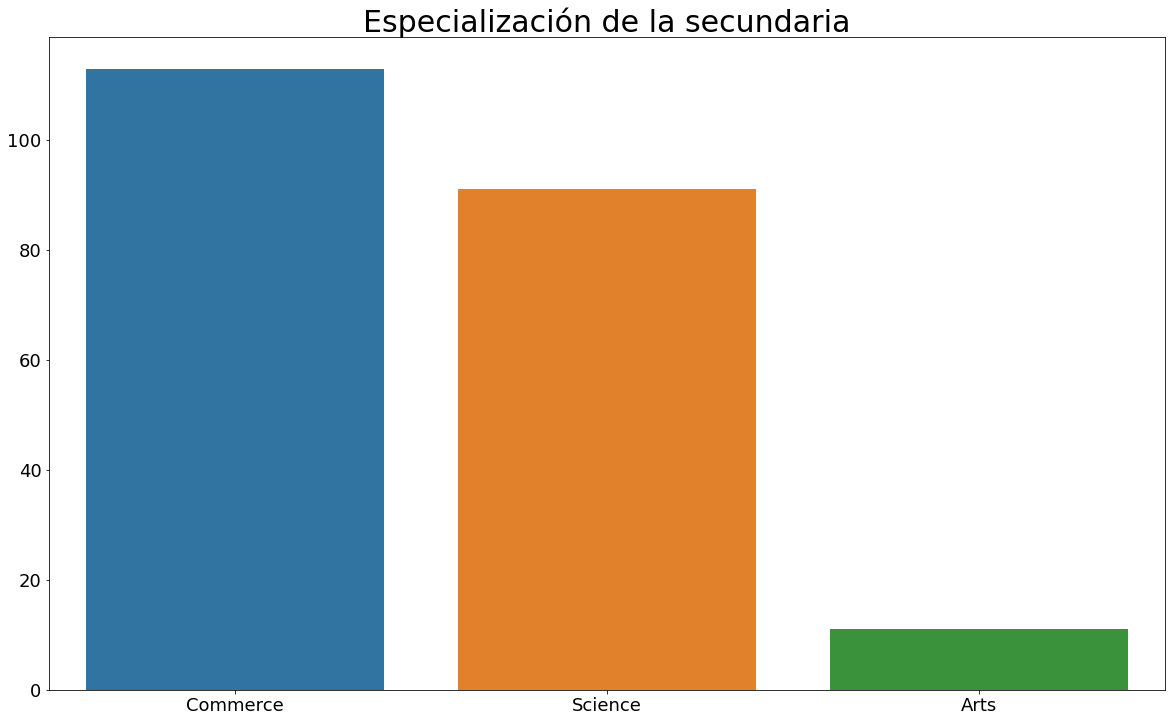

In [11]:
sns.countplot(df.hsc_s)
plt.title("Especialización de la secundaria", size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

Solo por curiosidad y recordando que __el número de mujeres es mucho menor al de hombres__ (en este conjunto de datos), se aprecia que las mujeres prefieren tomar la especialización en Artes.

Text(0, 0.5, '')

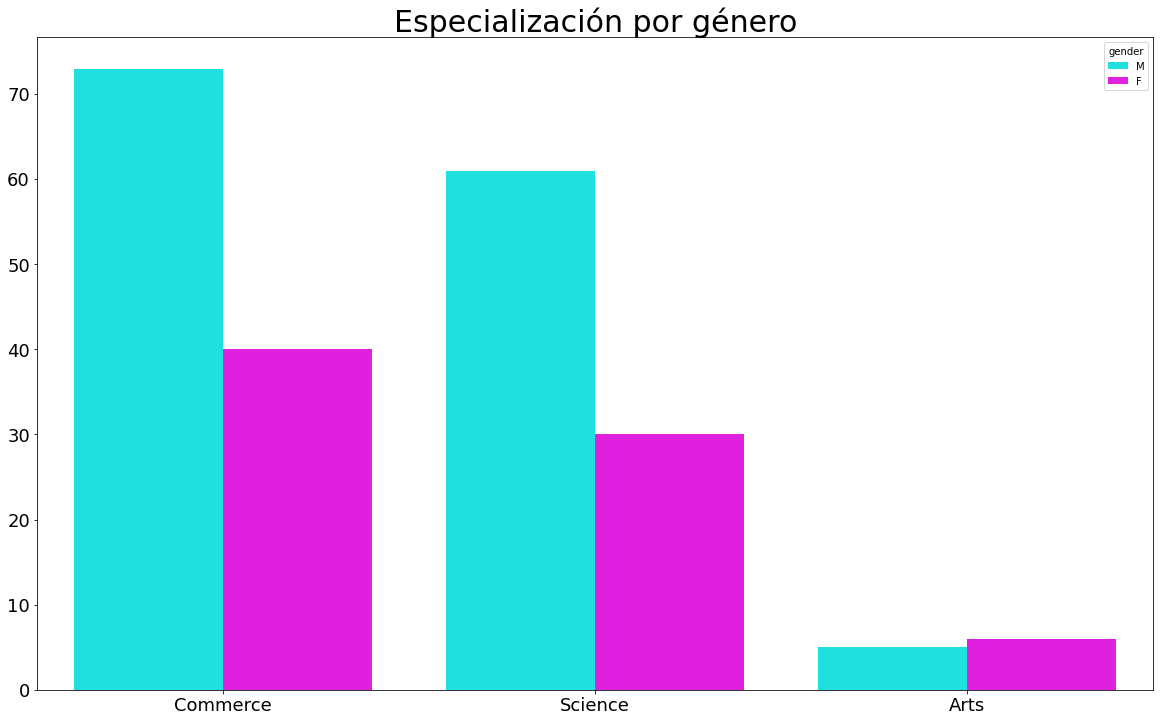

In [12]:
sns.countplot(data = df, x = "hsc_s", hue = "gender", palette = ["aqua","magenta"])
plt.title("Especialización por género",size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

### DEGREE_P
Se observa una distribución más simétrica en cuanto a las calificaciones de carrera, el kernel de la distribución nos muestra un ajuste muy parecido a la de una normal. Destaca un _outlier_, el cual es la única persona que obtuvo un promedio mayor a 90%. La media se ubica en 66%. Se observa un mínimo un poco más arriba de 50%. En comparación con las calificaciones de 12° grado, se puede ver una tendencia a aprobar de mejor manera los cursos. Esto puede deberse a que la mayoría de las veces los estudiantes reciben clases de materias de su agrado en la carrera, mientras que en 12° aún persisten los cursos de tronco común. 

Text(0.5, 0.98, 'Promedios de la carrera')

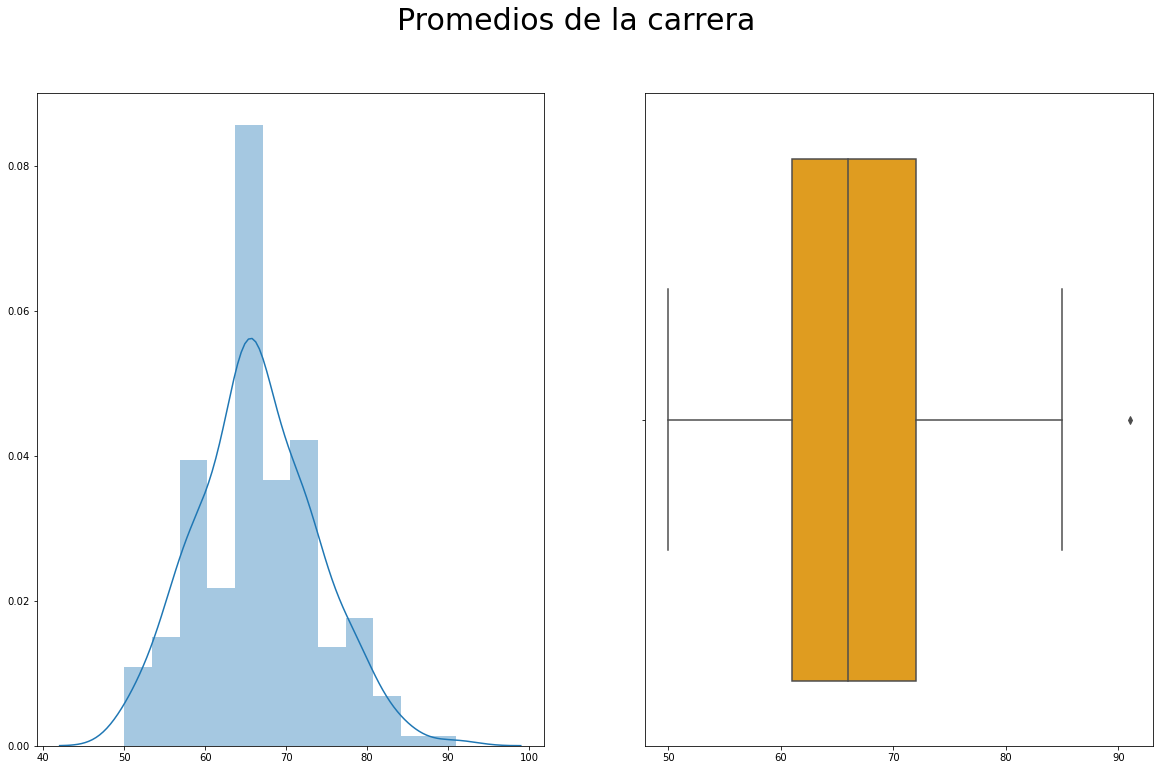

In [13]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(df.degree_p)
plt.xlabel("")
plt.subplot(1,2,2)
sns.boxplot(df.degree_p, color = "orange")
plt.xlabel("")
fig.suptitle('Promedios de la carrera', size = 30)

### DEGREE_T
Persiste la tendencia de la especialización de la secundaria, con el detalle sobre la existencia de un decremento en el estudio profesional en las áreas de ciencia y tecnología y un aumento en las de Comercio y Administración. Se puede atribuir a la dificultad que estas dos primeras implican. 

Text(0, 0.5, '')

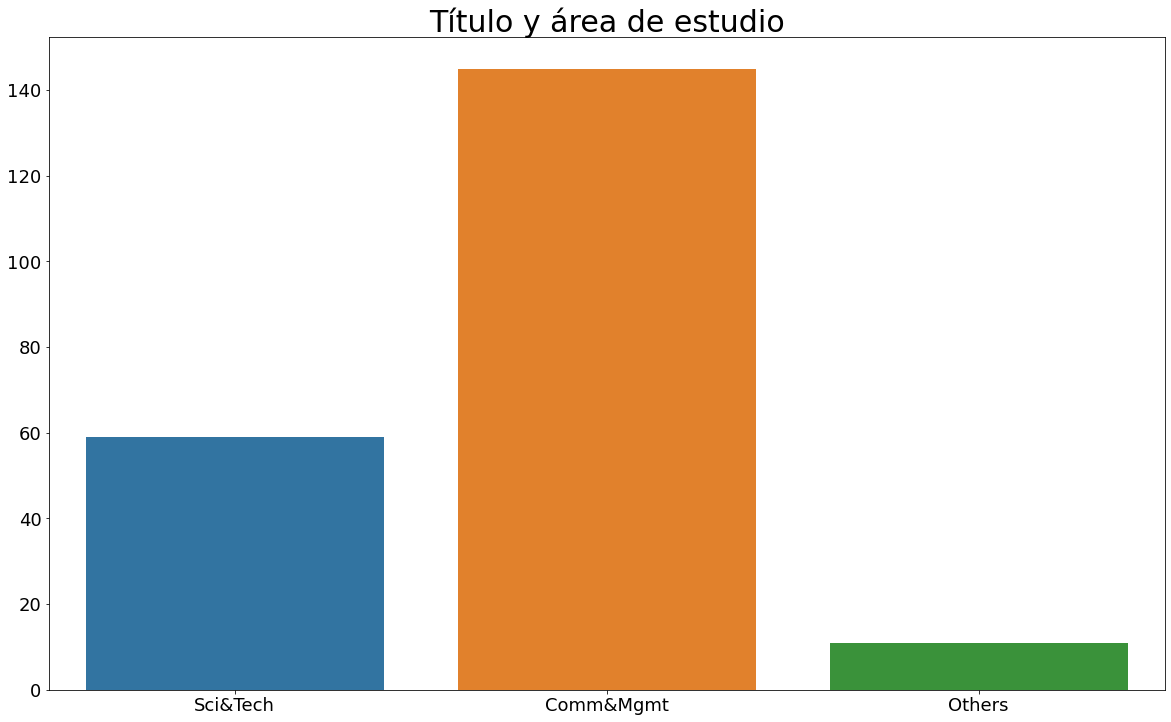

In [14]:
sns.countplot(df.degree_t)
plt.title("Título y área de estudio", size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

### WORKEX
La mayoría de los aplicantes (se presume casi el doble) no tiene experiencia laboral al concursar. 

Text(0, 0.5, '')

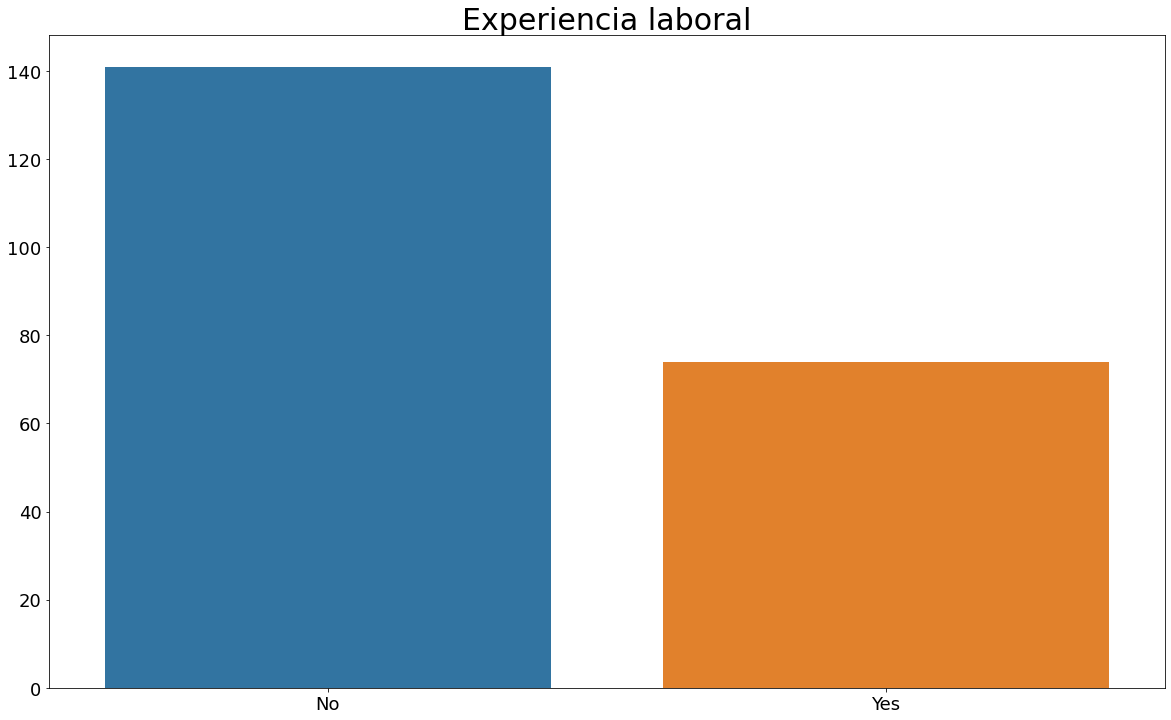

In [15]:
sns.countplot(df.workex)
plt.title("Experiencia laboral", size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

### ETEST_P
__La empleabilidad es un compendio de habilidades, actitudes, oportunidades y talento.__<br>
Se presenta una distribución sesgada positivamente, con una mediana muy cercana a 70% y un mínimo en 50%. Esto significa que la mayoría de los aplicantes (según la escuela) tienen habilidades, actitudes y talento que no los diferencian mucho del resto. Aún con esto, no es despreciable la cantidad de gente que tienen más del 80% que son seguramente aquellos que tendrán una oportunidad para estudiar en la escuela que aplican. 

Text(0.5, 0.98, 'Porcentaje de Empleabilidad')

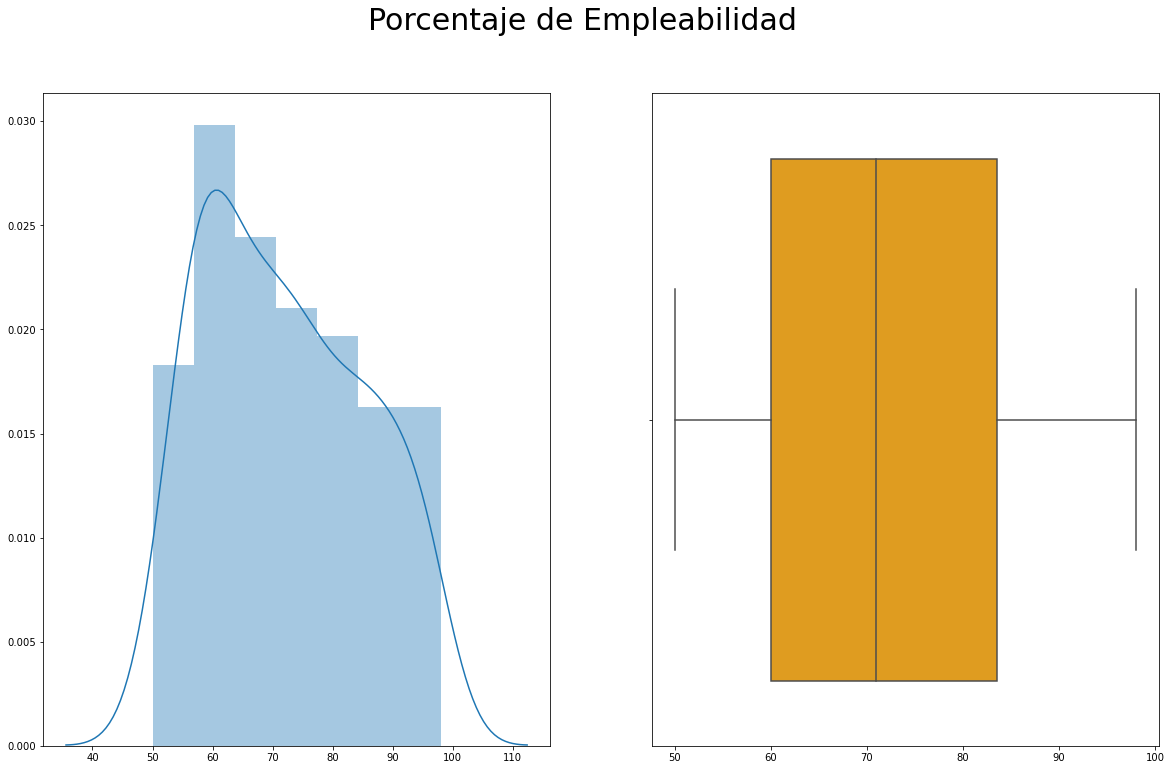

In [16]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(df.etest_p)
plt.xlabel("")
plt.subplot(1,2,2)
sns.boxplot(df.etest_p, color = "orange")
plt.xlabel("")
fig.suptitle('Porcentaje de Empleabilidad', size = 30)

### SPECIALISATION
En general, los aspirantes hicieron su MBA en Marketing, solamente que son más aquellos quienes lo combinaron con finanzas. Finanzas es un tema más de interes que Recursos Humanos.

Text(0, 0.5, '')

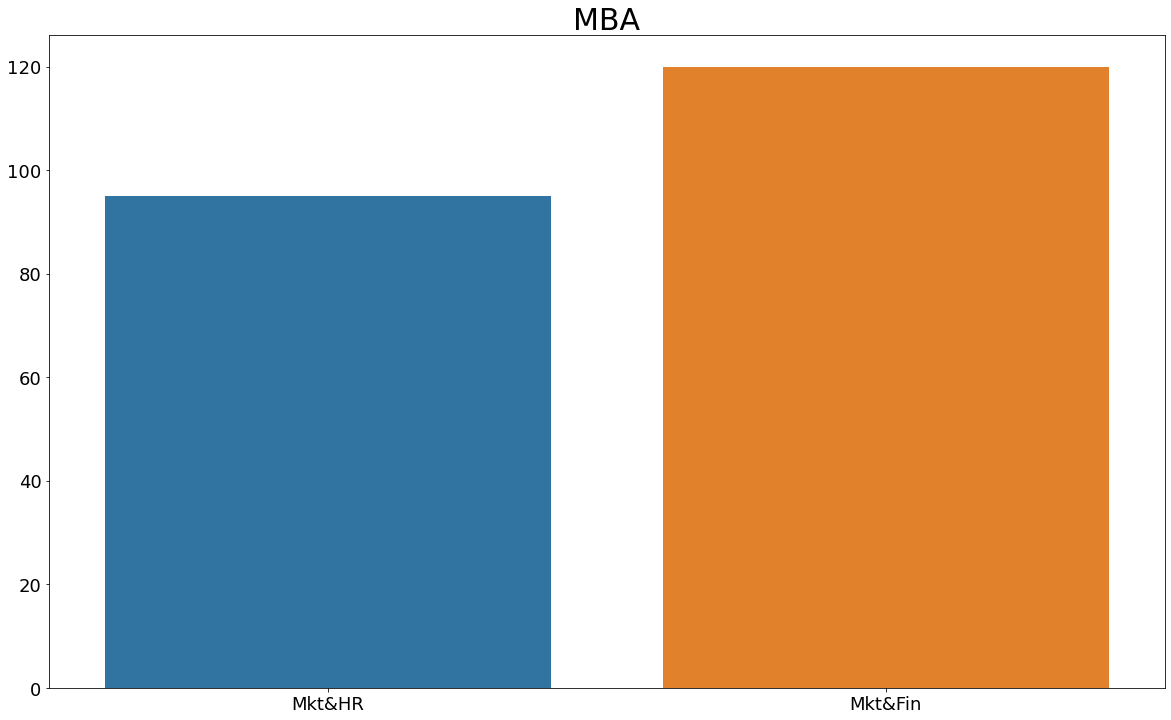

In [17]:
sns.countplot(df.specialisation)
plt.title("MBA", size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

### MBA_P
Como era de esperarse, la mayoría de las personas que estudian un MBA no obtienen tan buenas calificaciones como en grados anteriores, evidentemente por la difucultad de que estos tienen inherentes. La varianza respecto a la mediana es homogénea, notanto un sesgo positivo en la distribución. El valor máximo (que genera una cola derecha pesada) se ubica en el valor 77. Al menos en este conjunto de datos, ninguna persona superó el 80%.

Text(0.5, 0.98, 'Promedios de MBA')

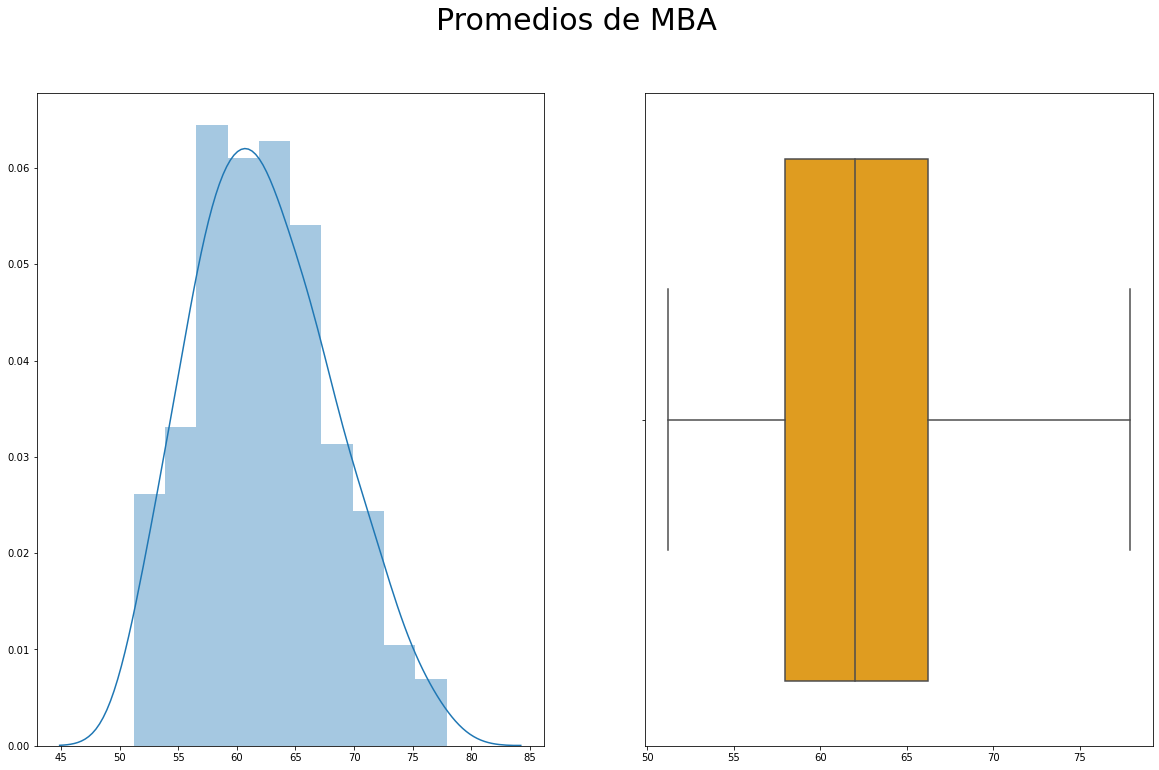

In [18]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(df.mba_p)
plt.xlabel("")
plt.subplot(1,2,2)
sns.boxplot(df.mba_p, color = "orange")
plt.xlabel("")
fig.suptitle('Promedios de MBA', size = 30)

### SALARY
Por lo general los salarios no son tan altos, pues 50% de estos oscilan entre 250,000 y 300,000 rupias. Aquellos casos en los que se ganan más de 400,000 ya son considerados como atípicos leves. Casos muy extremos se consideran a partir de 600,000 para arriba. El sesgo positivo es trivial desde que muy poca gente gana mucho dinero.

Text(0.5, 0.98, 'Salarios')

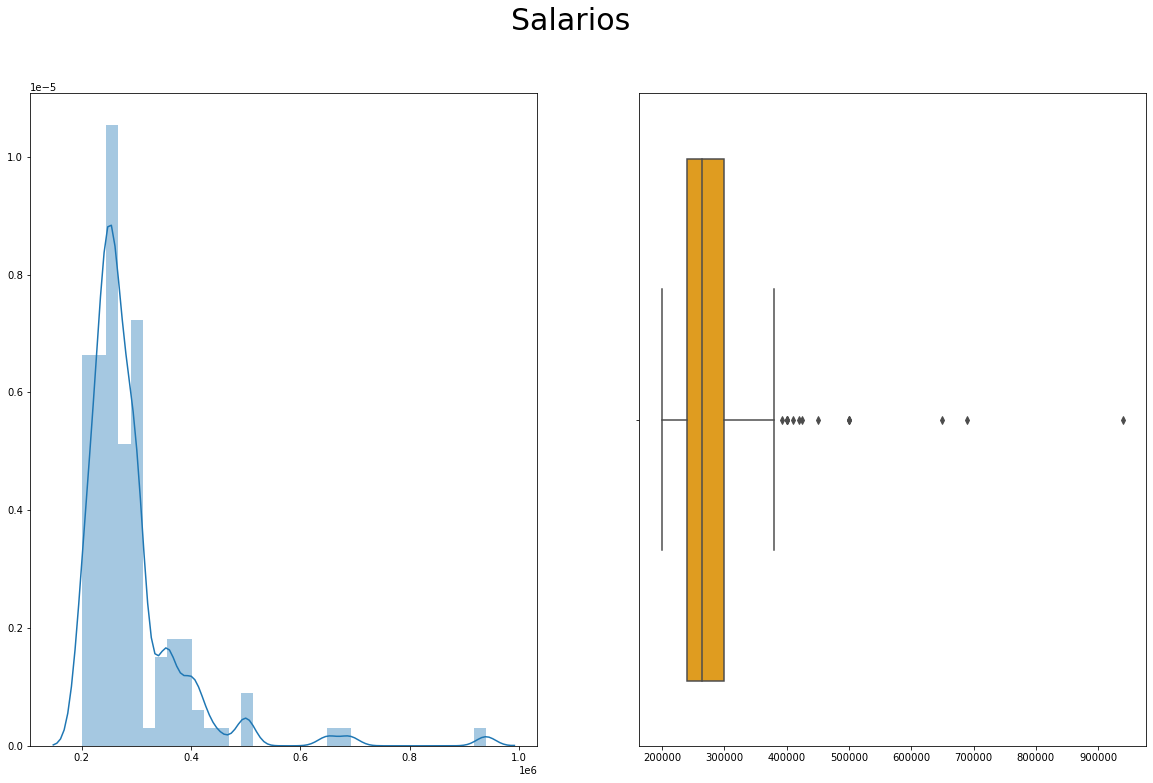

In [19]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(df.salary)
plt.xlabel("")
plt.subplot(1,2,2)
sns.boxplot(df.salary, color = "orange")
plt.xlabel("")
fig.suptitle('Salarios', size = 30)

### STATUS
El 70% de los aspirantes son aceptados. 

In [20]:
df.status.value_counts(normalize = True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

Text(0, 0.5, '')

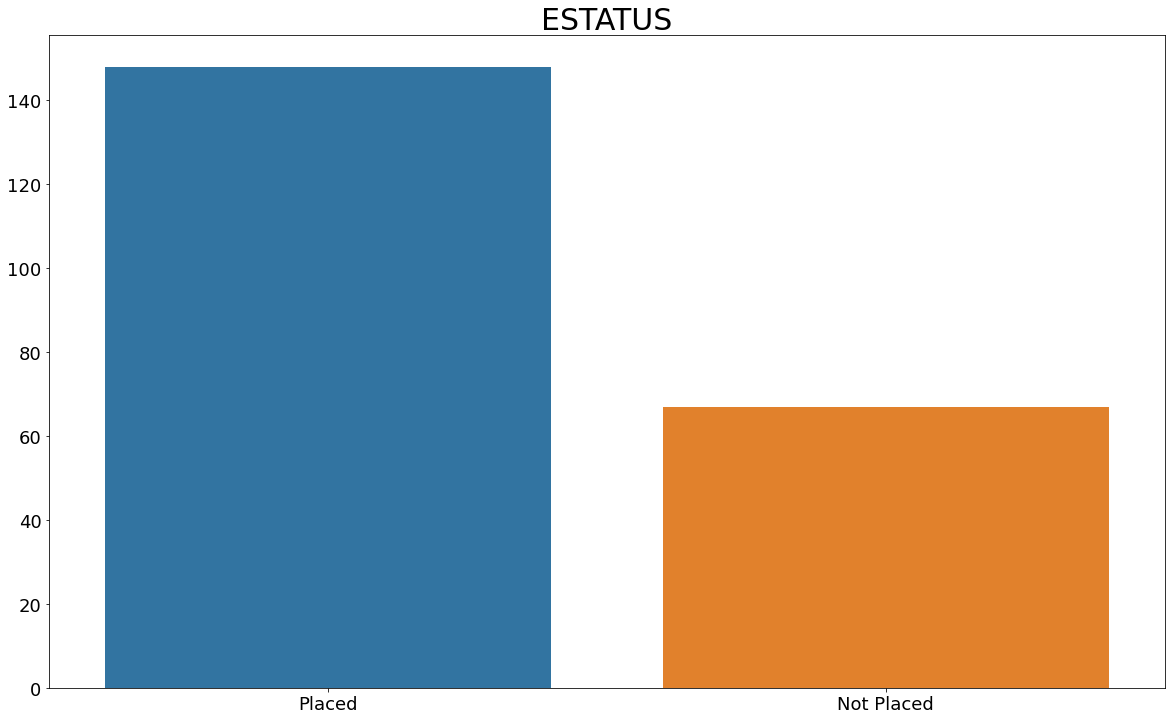

In [21]:
sns.countplot(df.status)
plt.title("ESTATUS", size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

Al parecer la misma proporción (tomando en cuenta la cantidad no homogénea de ambos generos) de hombres y mujeres son aceptados.

Text(0, 0.5, '')

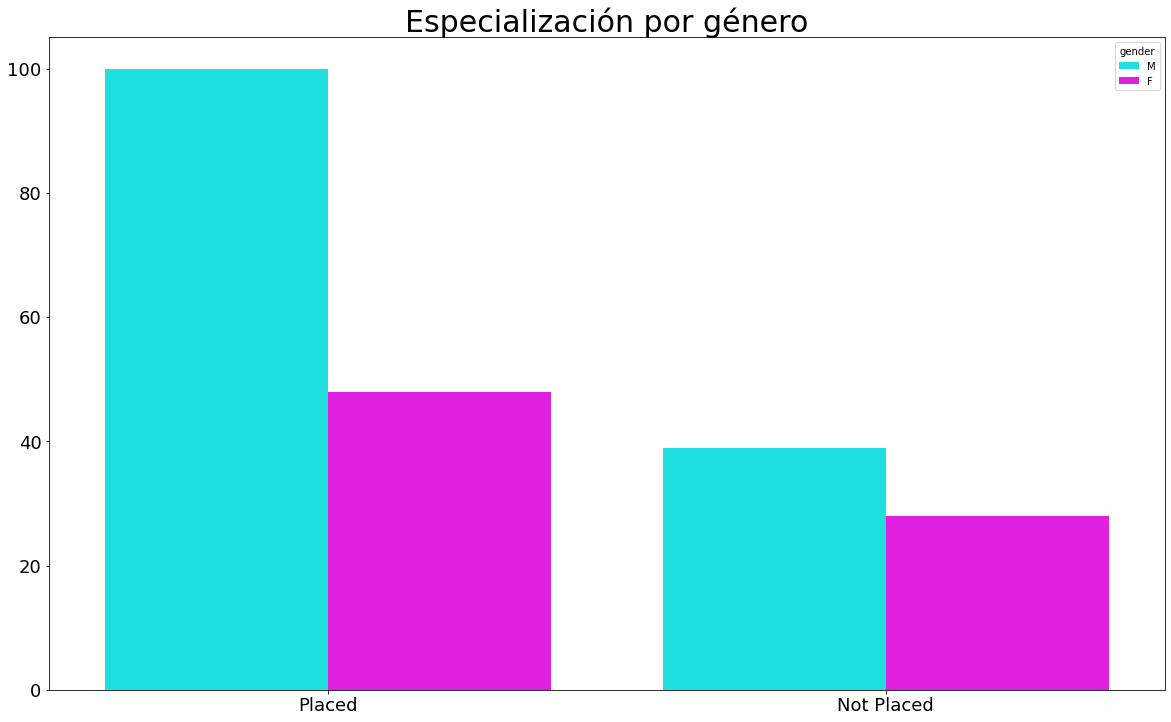

In [22]:
sns.countplot(data = df, x = "status", hue = "gender", palette = ["aqua","magenta"])
plt.title("Especialización por género",size = 30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("")
plt.ylabel("")

Separar los datos
---

In [74]:
X = df.drop(columns = "status")
Y = df.status.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

Sustituir NaN
---
Para evitar _data leakage_ se separaron primero los conjuntos de prueba y entrenamiento. Por tratarse de valores continuos, se sustituiran los valores NaN por el promedio de la columna de los salarios de cada conjunto.

In [75]:
x_train.salary.fillna(round(np.mean(x_train.salary)), inplace = True)

In [76]:
x_test.salary.fillna(round(np.mean(x_test.salary)), inplace = True)

Codificar variables
---

Codificar las variables independientes

In [79]:
x_train = pd.concat([pd.get_dummies(x_train.select_dtypes("object"), drop_first = True),x_train.select_dtypes(["int64","float"])], axis = 1)
x_test = pd.concat([pd.get_dummies(x_test.select_dtypes("object"), drop_first = True),x_test.select_dtypes(["int64","float"])], axis = 1)

Codificar la variable _target_.

In [85]:
le = preprocessing.LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Modelado
---
Se van a comparar ambos métodos con los parámetros por _default_.

### Árbol de decisión

In [90]:
clf = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = clf.predict(x_test)

#### __Accuracy__

In [92]:
metrics.accuracy_score(y_test,y_pred)

0.6461538461538462

#### __ROC/AUC SCORE__

In [96]:
metrics.roc_auc_score(y_test,y_pred)

0.4772727272727273

#### Matriz de confusión

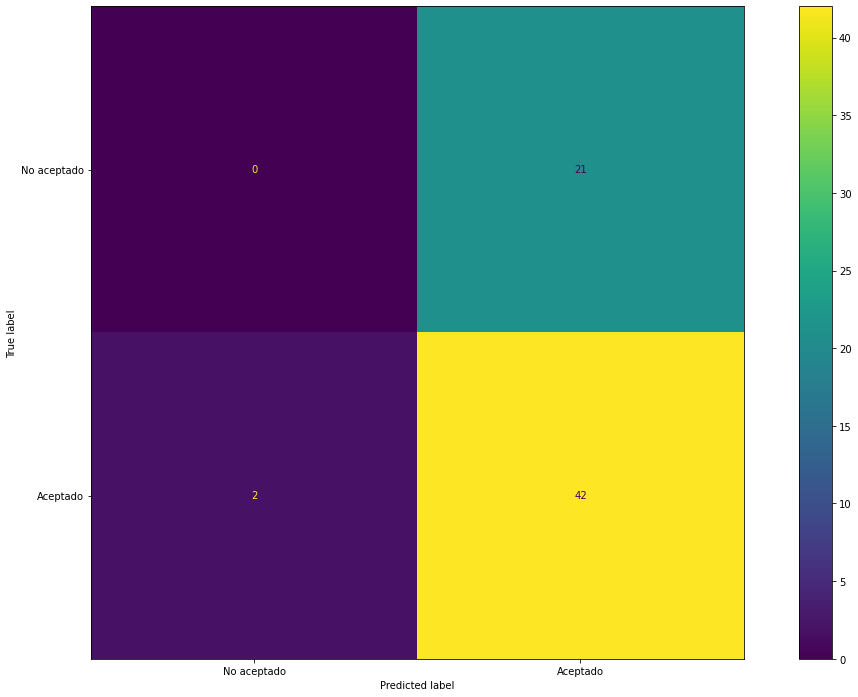

In [109]:
matrix = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(matrix, display_labels= ["No aceptado","Aceptado"])
disp.plot()

### Bosque aleatorio

In [93]:
clf2 = RandomForestClassifier().fit(x_train,y_train)
y_pred2 = clf2.predict(x_test)

#### __Accuracy__

In [95]:
metrics.accuracy_score(y_test,y_pred2)

0.8

#### __ROC/AUC SCORE__

In [97]:
metrics.roc_auc_score(y_test,y_pred2)

0.6904761904761905

#### Matriz de confusión

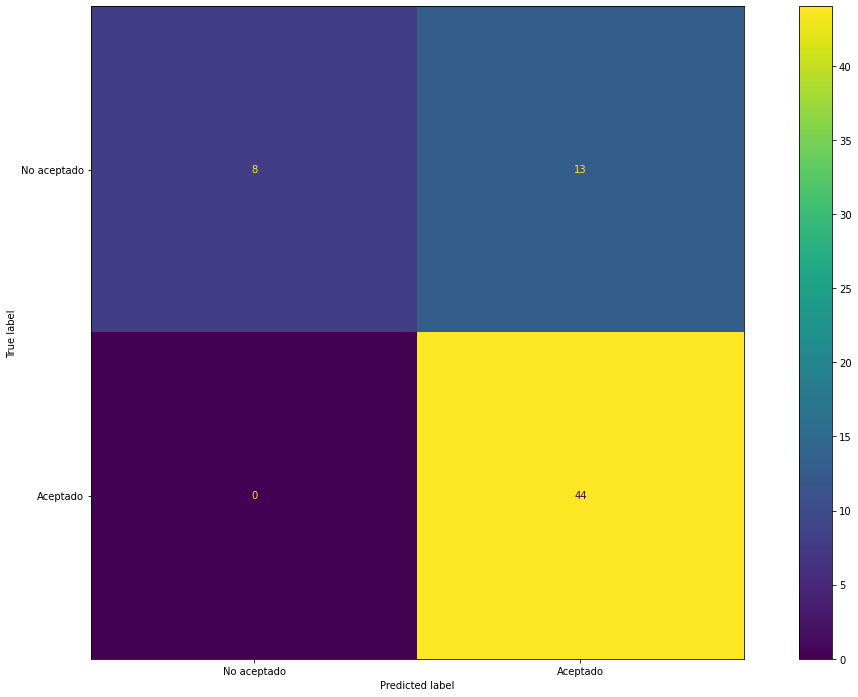

In [110]:
matrix = metrics.confusion_matrix(y_test,y_pred2)
disp = metrics.ConfusionMatrixDisplay(matrix,display_labels= ["No aceptado","Aceptado"])
disp.plot()

Conclusiones
---
Ambos modelos fueron puestos a prueba con los parámetros por _default_. Hemos optado por ocupar __el modelo de bosques aleatorios__.

__Accuracy__:
- Se observa que el Accuracy obtenido por el arbol de decisión es acertivo el 64% de los casos, mientras que el bosque aleatorio lo es el 80%. Se puede considerar que un valor para esta métrica del 80% cumple con las expectativas de un buen modelo.

__AUC ROC__:
- Recordando que un valor de 1 en está métrica representa un modelo perfecto, se puede ver que el AUC del bosque aletorio es bastante mayor al del arbol. Es más, el auc del árbol es incluso menor .5, por lo que básicamente está haciendo peor las cosas que adivinar. En contraste, el AUC del bosque es casi .7.

__Matriz de confusión__:
- En el caso del arbol, el modelo parece ser que manda todos los registros a "Aceptado" y los pocos que clasificó como "No Aceptados" los clasificó de manera incorrecta. Por otra parte, en el modelo del bosque, el modelo reconoce de mejor forma los casos "No aceptados" e incluso mejora aquellos que fueron "Aceptados". Hay que destacar que no comete errores de tipo uno: Ser aceptado y haber sido predicho no aceptado. El hecho de que en ambos modelos persista el error de "No haber sido aceptado" y ser clasificado como "Aceptado" es resultado del desbalance que hay en los datos, pues hay que recordar que el 70% de nuestros registros fueron de personas que sí fueron Aceptados, causando que el modelo tenga más información de este caso. Existen técnicas para este tipo de conjuntos de datos desproporcionales que podrías ayudar a minorar este error.